In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import ast
import os

*Xây dựng mô hình dự đoán bình luận tích cực hay tiêu cực*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df=pd.read_csv('Data/dataset.csv')

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

# Chuyển đổi văn bản thành ma trận đếm từ
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)

# Huấn luyện mô hình RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_counts, y_train)

# Chuyển đổi văn bản kiểm tra thành ma trận đếm từ
X_test_counts = vectorizer.transform(X_test)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test_counts)

# In ra độ chính xác của mô hình
print("Độ chính xác của mô hình: ", accuracy_score(y_test, y_pred))


Độ chính xác của mô hình:  0.7589001907183726


In [3]:
df = pd.read_csv('Data/comments_pro.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df


,facebookUrl,id,feedbackId,date,text,attachments,profileUrl,profilePicture,profileId,profileName,likesCount,facebookId,postTitle,commentsCount,redirectFromUrl,postPageFacebookId
0,https://facebook.com/pfbid036GiAAY3mrvxfRvV9Fa...,Y29tbWVudDo2Mjc1ODA3MzI4OTAzNjZfMTk3MjA0MjgyOT...,ZmVlZGJhY2s6NjI3NTgwNzMyODkwMzY2XzE5NzIwNDI4Mj...,2023-10-01 13:16:47,Nhìn ảnh nạn nhân mà đau lòng... Chi tiết vụ v...,"[{'style_list': ['share', 'fallback']}]",https://www.facebook.com/Theanh28,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,100069153349307,Theanh28 Entertainment,2,627580732890366,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mớ...",NaN,NaN,NaN
1,https://facebook.com/pfbid036GiAAY3mrvxfRvV9Fa...,Y29tbWVudDo2Mjc1ODA3MzI4OTAzNjZfODQzMzQwMDY3Nj...,ZmVlZGJhY2s6NjI3NTgwNzMyODkwMzY2Xzg0MzM0MDA2Nz...,2023-10-01 13:47:05,Mấy ngày nay tai nạn nhiệu vậy😢😢,NaN,https://www.facebook.com/people/Nguy%E1%BB%85n...,https://scontent-mia3-2.xx.fbcdn.net/v/t39.308...,pfbid02MpTnw4uqZNDq5bEmt6q2B3sgUj1NXL1C8gmFnut...,Nguyễn Hữu Khánh,1,627580732890366,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mớ...",NaN,NaN,NaN
2,https://facebook.com/pfbid036GiAAY3mrvxfRvV9Fa...,Y29tbWVudDo2Mjc1ODA3MzI4OTAzNjZfMTQ2ODY3MTAxMz...,ZmVlZGJhY2s6NjI3NTgwNzMyODkwMzY2XzE0Njg2NzEwMT...,2023-10-01 14:09:26,Không lẽ mỗi lần lên xe mình dặn bác tài đi từ...,NaN,https://www.facebook.com/baongoc2052000,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,pfbid02LuViGms9JKBprkEMvzkKiPbqk7fcMAtqVhMfXHm...,Nguyễn Ngọcc,0,627580732890366,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mớ...",NaN,NaN,NaN
3,https://facebook.com/pfbid036GiAAY3mrvxfRvV9Fa...,Y29tbWVudDo2Mjc1ODA3MzI4OTAzNjZfMTI4NDQ2MTkxOD...,ZmVlZGJhY2s6NjI3NTgwNzMyODkwMzY2XzEyODQ0NjE5MT...,2023-10-01 13:34:49,A Di Đà Phật 🙏,NaN,https://www.facebook.com/ntn8892,https://scontent-mia3-2.xx.fbcdn.net/v/t39.308...,pfbid02VajeEfgdE6eAyvZvx9pbCej6CU7CghNdBJsZthw...,Nguyễn Na,0,627580732890366,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mớ...",NaN,NaN,NaN
4,https://facebook.com/pfbid036GiAAY3mrvxfRvV9Fa...,Y29tbWVudDo2Mjc1ODA3MzI4OTAzNjZfMTQ3NTkyODMzMz...,ZmVlZGJhY2s6NjI3NTgwNzMyODkwMzY2XzE0NzU5MjgzMz...,2023-10-01 13:19:31,Say xe đã sợ đi xe đò rồi giờ thấy tự nhiên tế...,NaN,https://www.facebook.com/people/%C4%90%E1%BB%9...,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,pfbid027mY7szifuNfEGfvdfdwY69Qgtn3UyZjK92HGxVG...,Đỗ Thị Thu Hiền,3,627580732890366,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mớ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96449,https://facebook.com/pfbid037bA68QN1itD8P2FDi3...,Y29tbWVudDo2NDA1NzQ2MDQ5MjQzMTJfMTgwODYxNDQxNj...,ZmVlZGJhY2s6NjQwNTc0NjA0OTI0MzEyXzE4MDg2MTQ0MT...,2023-10-25 21:59:34,Vũ Thi Vân Anh Trang Thu khóc lụt sân bay 🥲,NaN,https://www.facebook.com/lephuongthao1407,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,100009547547763,Lê Thị Phương Thảo,1,640574604924312,Xem mà khóc theo em: đang trên xe ra sân bay c...,4.0,NaN,NaN
96450,https://facebook.com/pfbid037bA68QN1itD8P2FDi3...,Y29tbWVudDo2NDA1NzQ2MDQ5MjQzMTJfODUwMDMxNTM2OD...,ZmVlZGJhY2s6NjQwNTc0NjA0OTI0MzEyXzg1MDAzMTUzNj...,2023-10-24 22:37:59,Nguyễn Trần nữa tao tiễn m về nhà chồng kiểu d...,NaN,https://www.facebook.com/trbaloc2002,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,pfbid0i2BMwx15JihBjzvzGcmgmxTfUxcFaEcSoE4iBTE5...,Trần Bá Lộc,1,640574604924312,Xem mà khóc theo em: đang trên xe ra sân bay c...,1.0,NaN,NaN
96451,https://facebook.com/pfbid037bA68QN1itD8P2FDi3...,Y29tbWVudDo2NDA1NzQ2MDQ5MjQzMTJfMTM2NTkxNjg1ND...,ZmVlZGJhY2s6NjQwNTc0NjA0OTI0MzEyXzEzNjU5MTY4NT...,2023-10-24 17:43:41,Triệu Huy mai tôi đi mỹ,NaN,https://www.facebook.com/miladuon,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,pfbid025hWrBGGMdDkfFBGmxmLDewSNR1T6CbZhpeGsod4...,Minh Dương,0,640574604924312,Xem mà khóc theo em: đang trên xe ra sân bay c...,2.0,NaN,NaN
96452,https://facebook.com/pfbid037bA68QN1itD8P2FDi3...,Y29tbWVudDo2NDA1NzQ2MDQ5MjQzMTJfMTI0MzM3Mzc0Nj...,ZmVlZGJhY2s6NjQwNTc0NjA0OTI0MzEyXzEyNDMzNzM3ND...,2

*Gán label cho mỗi bình luận*

In [5]:
# Chuyển đổi chuỗi thành từ điển
df['text'] = df['text'].astype(str)
# Chuyển đổi tất cả bình luận trong DataFrame thành ma trận đếm từ
df_counts = vectorizer.transform(df['text'])

# Dự đoán nhãn cho tất cả bình luận
df_pred = clf.predict(df_counts)

# Thêm nhãn dự đoán vào DataFrame như một cột mới
df['Sentiment'] = df_pred
# xử lí missing data
df['commentsCount']=df['commentsCount'].fillna(0)

*Người bình luận nhiều nhất*

In [5]:
# Tính số lượng bình luận của mỗi người
comments_per_person = df['profileId'].value_counts()

# Tính trung bình số lượng bình luận của mỗi người
average_comments_per_person = comments_per_person.mean()

# Người có số lượng bình luận trung bình cao nhất
most_average_comments_person = comments_per_person[comments_per_person > average_comments_per_person].idxmax()
most_average_comments_count = comments_per_person[comments_per_person > average_comments_per_person].max()

# Tìm tên của người có số lượng bình luận trung bình cao nhất
most_average_comments_name = df[df['profileId'] == most_average_comments_person]['profileName'].iloc[0]

print(f'Người có số lượng bình luận trung bình cao nhất là {most_average_comments_name} ({most_average_comments_person}) với trung bình {most_average_comments_count} bình luận.')


Người có số lượng bình luận trung bình cao nhất là Theanh28 Entertainment (100069153349307) với trung bình 723 bình luận.


In [ ]:
# Lọc DataFrame để chỉ giữ lại các hàng có 'profileName' bằng 'Theanh28 Entertainment'
filtered_df = df[df['profileName'] == 'Theanh28 Entertainment']

# Chỉ giữ lại cột 'profileName' và 'text'
filtered_df = filtered_df[['profileName', 'text','postTitle']]
filtered_df = filtered_df.reset_index(drop=True)

In [24]:
pd.set_option('display.max_colwidth', 200)

filtered_df

,profileName,text,postTitle
0,Theanh28 Entertainment,Nhìn ảnh nạn nhân mà đau lòng... Chi tiết vụ việc tại Báo Nhân Dân nhé https://nhandan.vn/nan-nhan-thu-5-tu-vong-trong-vu-tai-nan-giao-thong-tren-quoc-lo-20-post775396.html,"Được biết, con gái nạn nhân thứ 5 t.ử v.ong mới 18 tuổi, đang được điều trị tại Bệnh viện đa khoa Đồng Nai trong tình trạng nguy kịch. Quá thương tâm! Chi tiết vụ việc dưới phần bình luận nhé 👇"
1,Theanh28 Entertainment,"Trước tình huống cấp thiết, Phòng Cảnh sát Phòng cháy chữa cháy và Cứu nạn cứu hộ đã huy động một xe thang, một xe cứu nạn cùng 15 cán bộ, chiến sĩ đến hiện trường.\n\nCảnh sát nhận định cửa bị kh...","DÙ TRỜI MƯA VÀ PHẢI THỰC HIỆN NHIỆM VỤ Ở ĐỘ CAO 60M, CẢNH SÁT ĐÃ TIẾP CẬN HIỆN TRƯỜNG CHỈ TRONG VÀI PHÚT VÀ GIẢI CỨU THÀNH CÔNG CHÁU BÉ\n\nSáng 1/10, thông tin từ Phòng Cảnh sát phòng cháy chữa ch..."
2,Theanh28 Entertainment,"Ths.Bs Mai Thị Anh Thư (Bệnh viện Mắt Hà Nội 2) cho biết, bệnh nhân bị cận loạn thị nặng từ bé do ảnh hưởng bởi gene di truyền khiến nhãn cầu có kích thước lớn hơn và lồi mắt hơn hẳn so với mắt ng...","NGÃ XE ĐẠP ĐIỆN, NGƯỜI ĐÀN ÔNG BỊ R.ƠI THỦY TINH THỂ, CÓ THỂ M.Ù VĨNH VIỄN\n\nTheo đó, anh N.D.T (31 tuổi, Gia Lâm, Hà Nội) ng.ã đ.ập mặt xuống lòng đường, mắt bên phải bị r.ơi thủy tinh thể buộc ..."
3,Theanh28 Entertainment,"Trước đó, khoảng 2h40 cùng ngày, xe ô tô khách mang biển kiểm soát 50F-004.83 do H.V.T (SN 1986, quê tỉnh Thừa Thiên Huế), điều khiển chở theo 34 hành khách, lưu thông trên quốc lộ 20 hướng từ Dầu...","DÙ ĐÃ BỊ TƯỚC BẰNG LÁI NHƯNG TÀI XẾ VẪN ĐIỀU KHIỂN XE GÂY T.AI N.ẠN\n\nNgày 1/10, Công an tỉnh Đồng Nai thông tin, sẽ mở rộng điều tra rõ trách nhiệm chủ xe Thành Bưởi và những người khác liên qua..."
4,Theanh28 Entertainment,CHÙM ẢNH TUYỆT ĐẸP CARNAVAL THU HÀ NỘI TẠI ĐÂY:\nhttps://nhandan.vn/anh-ruc-ro-sac-mau-carnaval-thu-ha-noi-tren-pho-di-bo-ho-hoan-kiem-post775421.html,"Sáng 1/10, Carnaval Thu Hà Nội nằm trong khuôn khổ Festival Thu Hà Nội đã diễn ra vô cùng sôi động tại phố đi bộ hồ Hoàn Kiếm.\n\nNhững tiết mục biểu diễn được dàn dựng công phu với quy mô hơn 1.5..."
...,...,...,...
718,Theanh28 Entertainment,Em Dúi ngủ ngoan nhé ❤️,"Tạm biệt Dúi, thời gian qua em đã mang lại niềm vui cho rất nhiều người ♥️"
719,Theanh28 Entertainment,Ăn xong vẫn đói🥵,"BỮA CƠM LÈO TÈO 32K CỦA HỌC SINH TRƯỜNG BÁN TRÚ\n\nMới đây phụ huynh Trường THCS Yên Nghĩa đã bất ngờ kiểm tra bếp ăn và vô cùng bức xúc khi chứng kiến bữa ăn của các con chỉ ""lèo tèo"" vài món.\n\..."
720,Theanh28 Entertainment,"Giám đốc Sở GD-ĐT TP.HCM khẳng định ""không có khái niệm quỹ lớp quỹ trường"".","SỞ GD-ĐT TP.HCM SẼ THANH TRA TỪ NGÀY 16/10 - 16/11\n\nSở GD-ĐT TP.HCM sẽ thanh tra, kiểm tra, giám sát tình hình công tác quản lý thu, chi đầu năm học tại các cơ sở giáo dục; Kiểm tra công tác ..."
721,Theanh28 Entertainment,Cho ai muốn đọc chi tiết câu chuyện thì vào đây nhé https://www.facebook.com/groups/cafeduongpho.vn/?sorting_setting=CHRONOLOGICAL,"MÃI MÃI LÀ CHỈ TỪ THỨ 7 ĐẾN HẾT CHỦ NHẬT\n\nMới đây, 1 chị vợ đã chia sẻ câu chuyện mà chẳng có 1 người phụ nữ nào muốn gặp phải khi lấy chồng. Được biết, con bị ốm phải nhập viện nên chị 1 mình v..."


*Phân tích mức độ tương tác comment*

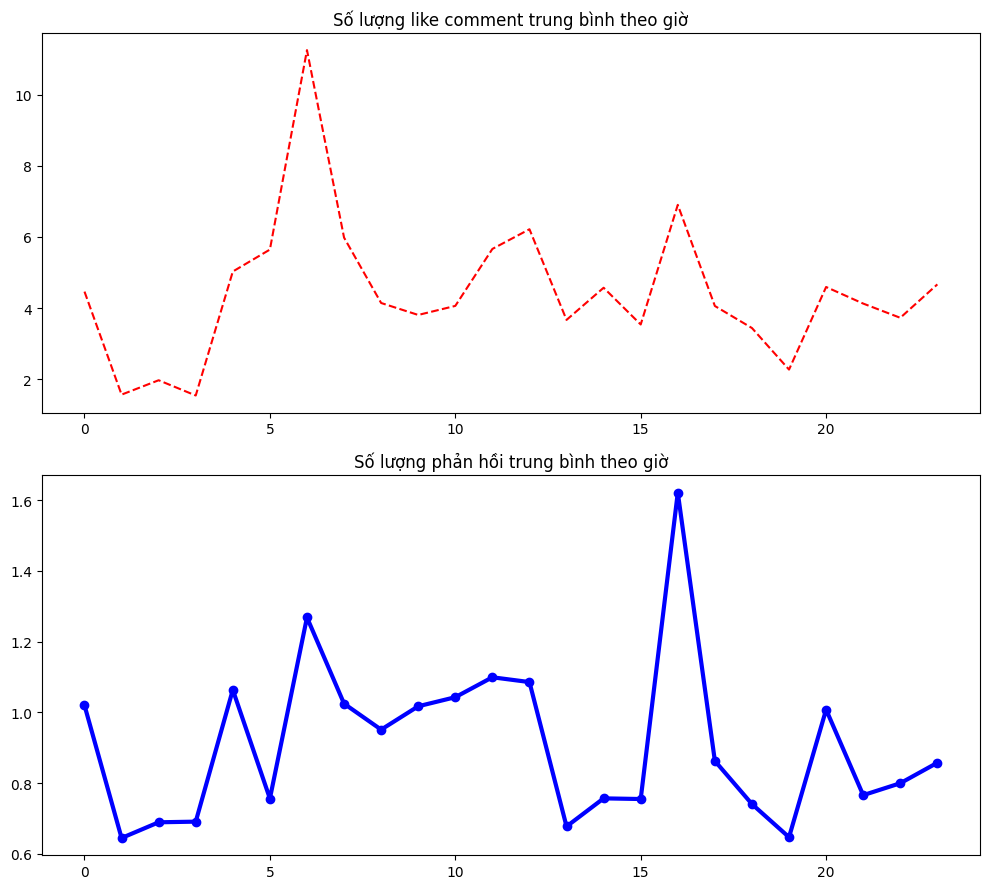

In [7]:
# Chuyển đổi cột 'date' thành định dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Trích xuất giờ từ cột 'date' và thêm vào DataFrame như một cột mới
df['hour'] = df['date'].dt.hour

# Tính số lượng comment trung bình và commentsCount trung bình theo giờ
avg_comments = df.groupby('hour')['likesCount'].mean()
avg_commentsCount = df.groupby('hour')['commentsCount'].mean()

# Vẽ biểu đồ
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

axs[0].plot(avg_comments, c='red', linestyle='--')
axs[0].set_title('Số lượng like comment trung bình theo giờ')

axs[1].plot(avg_commentsCount, c='blue', marker='o', linewidth=3.0)
axs[1].set_title('Số lượng phản hồi trung bình theo giờ')


plt.tight_layout()
plt.show()


*Phân tích bình luận tích cực hay tiêu cực*

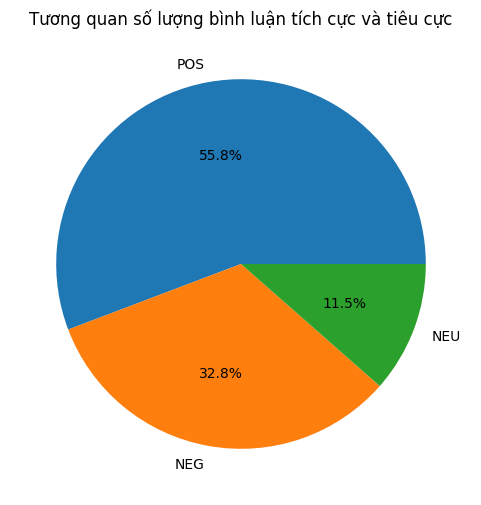

In [8]:
# Đếm số lượng bình luận tích cực và tiêu cực
sentiment_counts = df['Sentiment'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Tương quan số lượng bình luận tích cực và tiêu cực')
plt.show()
